## Observations and Insights

In [ ]:
# There is linear relationship between time point and tumor volume -the longer mice taking the drug, 
#the less tumor volumn is. 

In [ ]:
# The heavier the mices are, the more tumor volumns they might get - don't get fat!!

In [ ]:
# Ceftamin shows the most stable statistics with minimum/no outliers. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_file = mouse_metadata.merge(study_results,on="Mouse ID",how="outer")
merge_file.to_excel("merge.xlsx")
merge_file

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume_file=merge_file[["Drug Regimen","Tumor Volume (mm3)"]]
groupby_drug = tumor_volume_file.groupby("Drug Regimen")
sum_df = groupby_drug.agg(["mean","median","var","std","sem"])
sum_df            

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

(0, 280)

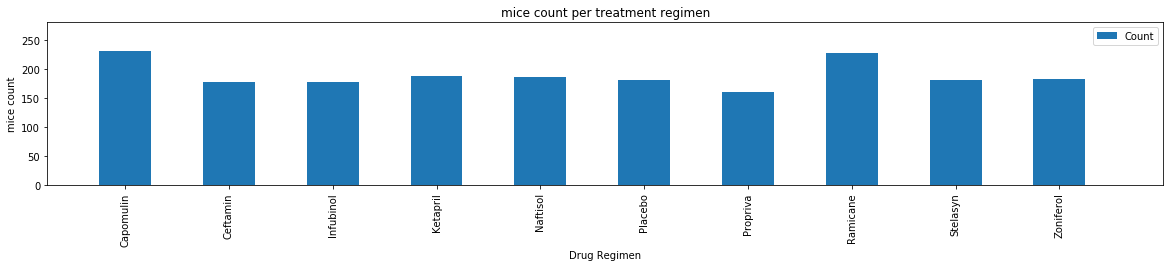

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#generate data points for each treatment regimen
treatment_regimen = merge_file.groupby("Drug Regimen").count()
treatment_regimen_df= pd.DataFrame(treatment_regimen["Mouse ID"])
treatment_regimen_df = treatment_regimen_df.rename(columns={"Mouse ID":"Count"})



#generate bar plot by using pandas

treatment_regimen_plot = treatment_regimen_df.plot(kind="bar",figsize=(20,3))
plt.title("mice count per treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("mice count")
plt.xlim(-0.75,len(treatment_regimen_df.index))
plt.ylim(0,max(treatment_regimen_df["Count"])+50)

(0, 280)

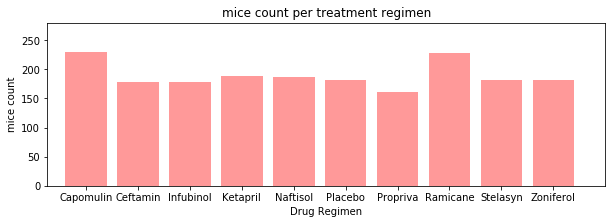

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(10,3))
y_axis=treatment_regimen_df["Count"]
x_axis= treatment_regimen_df.index
plt.bar(x_axis,y_axis,color="r",alpha = 0.4)
plt.title("mice count per treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("mice count")
plt.xlim(-0.75,len(treatment_regimen_df.index))
plt.ylim(0,max(treatment_regimen_df["Count"])+50)

## Pie plots

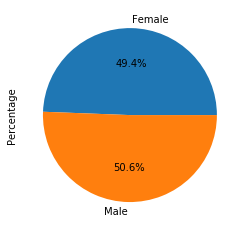

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#generate data points for female versus male mice 
mice_gender = merge_file.groupby("Sex").count()
mice_gender_df = pd.DataFrame(mice_gender["Mouse ID"])
mice_gender_df = mice_gender_df.rename(columns={"Mouse ID":"Total Count"})
mice_total = mice_gender_df["Total Count"].sum()
mice_gender_df["Percentage"]=(100*(mice_gender_df["Total Count"]/mice_total)).round(2)

# generate pie plot with pandas
mice_gender_plot = mice_gender_df["Percentage"].plot(kind="pie",autopct="%1.1f%%",subplots=True)


([<matplotlib.patches.Wedge at 0x1a2181fd90>,
 [Text(-0.7230838324439438, -0.8289449748072418, 'Female'),
  Text(0.7230838324439444, 0.8289449748072414, 'Male')],
 [Text(-0.39440936315124203, -0.45215180444031366, '49.4%'),
  Text(0.3944093631512423, 0.45215180444031344, '50.6%')])

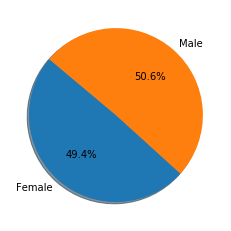

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= mice_gender_df.index
sizes = mice_gender_df["Percentage"]
plt.pie(sizes, labels=labels, 
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
#-Capomulin, Ramicane, Infubinol, and Ceftamin. 

final_tumor = merge_file[["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Timepoint"]]
condition = final_tumor["Drug Regimen"].str.contains("apomulin|Ramicane|Infubinol|Ceftamin")
four_treatment = final_tumor[condition]
final_tumor_volumn1 = four_treatment.sort_values(by="Timepoint",ascending=False)
final_tumor_volumn = final_tumor_volumn1.groupby("Mouse ID").first()
#final_tumor_volumn.to_excel("final_tumor.xlsx")
#display data
final_tumor_volumn

,Drug Regimen,Tumor Volume (mm3),Timepoint
Mouse ID,,,
a203,Infubinol,67.973419,45
a251,Infubinol,65.525743,45
a275,Ceftamin,62.999356,45
a411,Ramicane,38.407618,45
a444,Ramicane,43.047543,45
...,...,...,...
y769,Ceftamin,68.594745,45
y793,Capomulin,31.896238,45
y865,Ceftamin,64.729837,45


In [35]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#calculate IQR
Q1= final_tumor_volumn["Tumor Volume (mm3)"].quantile(0.25) 
Q3= final_tumor_volumn["Tumor Volume (mm3)"].quantile(0.75) 
IQR= Q3-Q1

#determine lower bound and upper bound for Outliers
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

print(f'The lower quartile of tumor volumn is :{lower_bound}')
print(f'The upper quartile of tumor volumn is :{upper_bound}')
print(f'The interquartile range of tumor volumn is :{IQR}')
print(f'Tumor volumn above {upper_bound} could be outliers.')
print(f'Tumor volumn below {lower_bound} could be outliers.')

The lower quartile of tumor volumn is :3.0739668737499812
The upper quartile of tumor volumn is :94.04403868375002
The interquartile range of tumor volumn is :22.74251795250001
Tumor volumn above 94.04403868375002 could be outliers.
Tumor volumn below 3.0739668737499812 could be outliers.


In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#reset data Frame by removing index
final_tumor_volumn_df = final_tumor_volumn.reset_index(["Mouse ID"])

#split into 4 different dataframes for each drug regimen

df_capomulin = final_tumor_volumn_df.loc[final_tumor_volumn_df["Drug Regimen"] == "Capomulin"]

df_ceftamin = final_tumor_volumn_df.loc[final_tumor_volumn_df["Drug Regimen"] == "Ceftamin"]

df_infubinol = final_tumor_volumn_df.loc[final_tumor_volumn_df["Drug Regimen"] == "Infubinol"]

df_ramicane = final_tumor_volumn_df.loc[final_tumor_volumn_df["Drug Regimen"] == "Ramicane"]


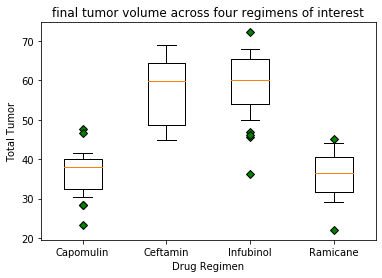

In [17]:
#consolidate the 4 data frame into one for the box plot
data= [df_capomulin["Tumor Volume (mm3)"],df_ceftamin["Tumor Volume (mm3)"],df_infubinol["Tumor Volume (mm3)"],
       df_ramicane["Tumor Volume (mm3)"]]


fig1, ax1 = plt.subplots()
#ax1.boxplot(data,whis=0.5)


#show outliers
green_diamond = dict(markerfacecolor="g", marker="D")

ax1.boxplot(data, whis=0.5, flierprops=green_diamond)

#add xticks
x_axis= np.arange(len(data))
tick_locations = [value for value in (x_axis+1)]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])

#add title and labels
plt.title("final tumor volume across four regimens of interest")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Tumor")

plt.show()


## Line and scatter plots

Text(0, 0.5, 'Time Point')

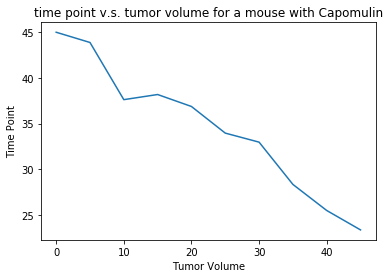

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

time_point=merge_file[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]

time_point_df= pd.DataFrame(time_point.loc[time_point["Drug Regimen"] == "Capomulin"])

capomulin_timepoint_df = time_point_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

Mouse_s185= capomulin_timepoint_df.loc[capomulin_timepoint_df["Mouse ID"]=="s185"]


timepoint = Mouse_s185["Timepoint"]
tumor_vol = Mouse_s185["Tumor Volume (mm3)"]

#timepoint,=plt.plot(tumor_vol,timepoint)
plt.plot(timepoint, tumor_vol) 
plt.title("time point v.s. tumor volume for a mouse with Capomulin")
plt.xlabel("Tumor Volume")
plt.ylabel("Time Point")



(32, 47.798969507500004)

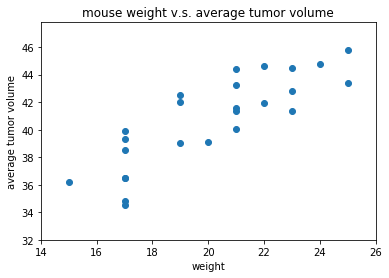

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = merge_file[["Mouse ID","Drug Regimen","Weight (g)","Timepoint","Tumor Volume (mm3)"]]
mouse_weight_df = pd.DataFrame(mouse_weight.loc[mouse_weight["Drug Regimen"] == "Capomulin"])
weight_groupby_df = mouse_weight_df.groupby("Mouse ID")
# weight_groupby_df.head()
average_Tumor= pd.DataFrame(weight_groupby_df["Tumor Volume (mm3)","Weight (g)"].mean())
# average_Tumor

weight = average_Tumor["Weight (g)"]
tumor_volume_average =average_Tumor["Tumor Volume (mm3)"]


plt.scatter(weight,tumor_volume_average)

plt.title("mouse weight v.s. average tumor volume")
plt.xlabel("weight")
plt.ylabel("average tumor volume")

plt.xlim(14,max(weight)+1)
plt.ylim(32,max(tumor_volume_average)+2)


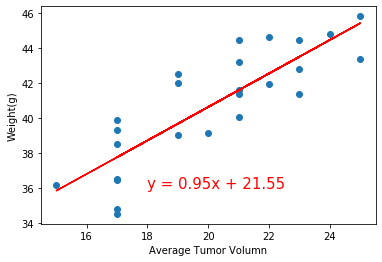

In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
#and average tumor volume for the Capomulin regimen

x_values = weight
y_values = tumor_volume_average

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(18,36),fontsize=15,color="red")

plt.xlabel('Average Tumor Volumn')
plt.ylabel('Weight(g)')

#display chart
plt.show()
